In [14]:
from scipy.stats import binom
import numpy as np
from empiricaldist import Pmf

ImportError: cannot import name 'decorate' from 'utils' (c:\Users\mmqq2\AppData\Local\Programs\Python\Python38\lib\site-packages\utils\__init__.py)

In [3]:
n = 2
p = 0.5
k = 1

binom.pmf(k, n, p)

0.5000000000000002

In [6]:
ks = np.arange(n+1)
ps = binom.pmf(ks, n, p)

ps

array([0.25, 0.5 , 0.25])

In [8]:
pmf_k = Pmf(ps, ks)
pmf_k

,probs
0,0.25
1,0.50
2,0.25


In [11]:
def make_binomial(n, p):
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)

In [12]:
pmf_k = make_binomial(n=250, p=0.5)


<AxesSubplot: >

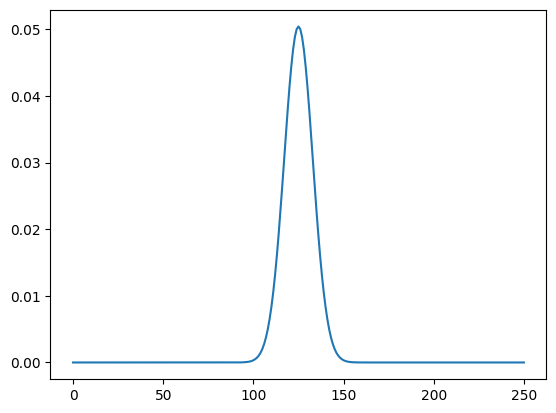

In [16]:
pmf_k.plot(label='n=250, p=0.5')

In [17]:
pmf_k.max_prob()

125

In [18]:
pmf_k[125]

0.050412213147309655

In [19]:
pmf_k[140]

0.008357181724918204

In [20]:
hypos = np.linspace(0.1, 0.4, 101)
prior = Pmf(1, hypos)

In [25]:
print(hypos)

[0.1   0.103 0.106 0.109 0.112 0.115 0.118 0.121 0.124 0.127 0.13  0.133
 0.136 0.139 0.142 0.145 0.148 0.151 0.154 0.157 0.16  0.163 0.166 0.169
 0.172 0.175 0.178 0.181 0.184 0.187 0.19  0.193 0.196 0.199 0.202 0.205
 0.208 0.211 0.214 0.217 0.22  0.223 0.226 0.229 0.232 0.235 0.238 0.241
 0.244 0.247 0.25  0.253 0.256 0.259 0.262 0.265 0.268 0.271 0.274 0.277
 0.28  0.283 0.286 0.289 0.292 0.295 0.298 0.301 0.304 0.307 0.31  0.313
 0.316 0.319 0.322 0.325 0.328 0.331 0.334 0.337 0.34  0.343 0.346 0.349
 0.352 0.355 0.358 0.361 0.364 0.367 0.37  0.373 0.376 0.379 0.382 0.385
 0.388 0.391 0.394 0.397 0.4  ]


In [24]:
print(prior)

0.100    0.000003
0.103    0.000004
0.106    0.000007
0.109    0.000011
0.112    0.000017
           ...   
0.388    0.000392
0.391    0.000329
0.394    0.000275
0.397    0.000229
0.400    0.000190
Name: , Length: 101, dtype: float64


In [21]:
likelihood = {
    'Y': hypos,
    'N': 1-hypos
}

In [22]:
dataset = 'Y' * 25 + 'N' * 75

In [23]:
for data in dataset:
    prior *= likelihood[data]

prior.normalize()

1.3596964206970507e-23